# CODE TO PERFORM SIMPLE LINEAR REGRESSION ON FUEL CONSUMPTION DATASET


# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT


In [2]:
!pip install --upgrade seaborn
!pip install --upgrade pandas



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 186.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 120.6 MB/s eta 0:00:00
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2022.6
    Uninstalling tzdata-2022.6:
      Successfully uninstalled tzdata-2022.6
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.1
    Uninstalling pandas-1.5.1:
      Successfully uninstalled pandas-1.5.1

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


# STEP #2: IMPORT DATASET

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
fueleconomy_df = pd.read_csv('FuelEconomy.csv')
fueleconomy_df.head()


,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [8]:
fueleconomy_df.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [9]:
fueleconomy_df.describe()




,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [10]:
fueleconomy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Horse Power           100 non-null float64
Fuel Economy (MPG)    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


# STEP#3: VISUALIZE DATASET

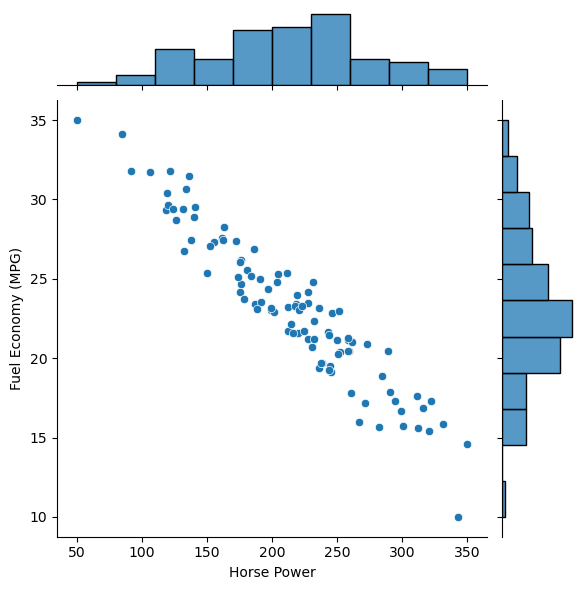

In [14]:
sns.jointplot(x='Horse Power',y='Fuel Economy (MPG)',data=fueleconomy_df)

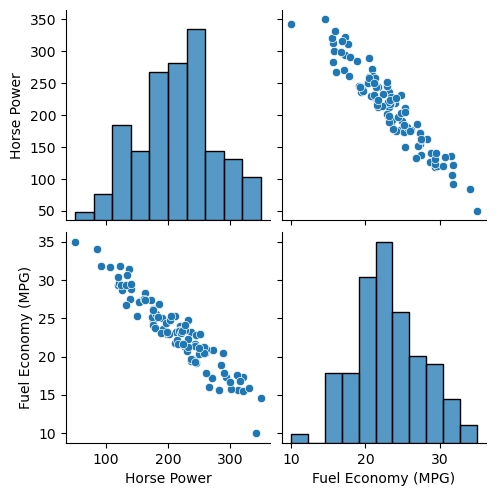

In [15]:
sns.pairplot(fueleconomy_df)

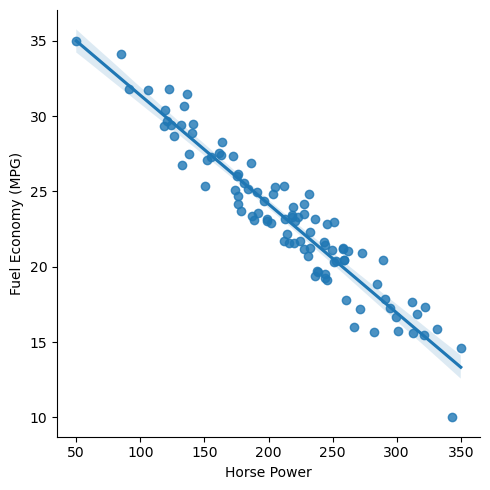

In [16]:
sns.lmplot(x='Horse Power',y='Fuel Economy (MPG)',data=fueleconomy_df)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [18]:
X=fueleconomy_df[['Horse Power']]

In [19]:
y=fueleconomy_df['Fuel Economy (MPG)']

In [20]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [21]:
y


0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [27]:
X_train.shape


(75, 1)

In [28]:
X_test.shape

(25, 1)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regressor=LinearRegression(fit_intercept=True)

In [31]:
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
print('Linear Model Coefficient(m):',regressor.coef_)
print('Linear Model Coefficient(b):',regressor.intercept_)


Linear Model Coefficient(m): [-0.07078057]
Linear Model Coefficient(b): 38.27489593426013


# STEP#6: TEST THE MODEL 

In [33]:
y_predict=regressor.predict(X_test)
y_predict

array([27.49162803, 26.75107328, 28.48843959, 20.52955001, 19.82421063,
       18.27200677, 16.96610986, 25.86360022, 15.92115393, 21.96261666,
       21.82195652, 29.63682396, 24.74880273, 23.21711171, 25.81898678,
       20.87558787, 29.74695325, 27.27450789, 22.75537406, 22.65214194,
       31.80270208, 21.02303543, 20.39909455, 30.75392563, 26.71286642])

In [34]:
y_test

38    27.094411
95    27.418661
34    27.473415
53    20.291766
94    17.802706
33    15.676316
35    15.725650
72    26.057085
69    16.831188
60    20.715722
21    22.313051
22    31.796612
17    24.989630
20    23.204745
31    26.188478
52    22.849711
11    29.678637
12    27.294930
2     23.952010
62    23.059180
28    31.806706
42    21.442703
39    20.407571
87    31.722566
9     28.289516
Name: Fuel Economy (MPG), dtype: float64

Text(0.5, 1.0, 'HP vs MPG(Training Dataset)')

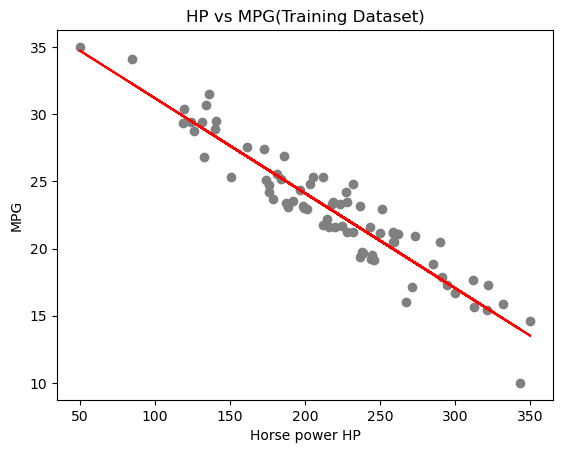

In [36]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.ylabel('MPG')
plt.xlabel('Horse power HP')
plt.title('HP vs MPG(Training Dataset)')

In [40]:
import numpy as np

HP = np.array([[240]])  

y_predict=regressor.predict(HP)
y_predict

array([21.28755954])

array([689.16364939])

# EXCELLENT JOB! NOW YOU BECAME EXPERT IN SIMPLE LINEAR REGRESSION